Exploratory Data Analysis 

EDA | ANALISIS PREDIKTIF PEMBATALAN RESERVASI HOTEL 

1. Business Understanding

Dalam industri perhotelan yang sangat kompetitif, tingkat pembatalan reservasi hotel merupakan isu penting yang dapat berdampak signifikan pada pendapatan dan operasional hotel. Pembatalan tidak hanya mengurangi tingkat hunian, tetapi juga menciptakan tantangan dalam perencanaan sumber daya, pengelolaan staf, dan pemenuhan ekspektasi pelanggan. Oleh karena itu, pemahaman yang mendalam mengenai faktor-faktor yang mempengaruhi keputusan tamu untuk membatalkan reservasi sangat penting bagi pengelola hotel.
Tujuan dari analisis ini adalah untuk membangun model prediktif yang akan membantu dalam mengidentifikasi karakteristik dan pola dari tamu yang berpotensi melakukan pembatalan. Dengan memanfaatkan data historis dari reservasi hotel, kami akan menganalisis berbagai variabel, seperti harga kamar, durasi menginap, dan jumlah tamu, yang mungkin berkontribusi terhadap keputusan pembatalan. Hasil dari model ini akan memberikan wawasan berharga bagi pengelola hotel untuk mengambil langkah-langkah strategis dalam meningkatkan pengalaman pelanggan dan mengurangi tingkat pembatalan.

Mengimpor Library yang Dibutuhkan. Langkah pertama adalah mengimpor Library Python yang relevan, seperti:
- Pandas: untuk memproses dan menganalisis data.
- Matplotlib dan Seaborn: untuk membuat visualisasi grafik.

In [11]:
# Impor Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Untuk menampilkan semua kolom sampai 200
pd.set_option('display.max_columns', 200) 

# Mengatur gaya plot untuk visualisasi yang konsisten
plt.style.use('ggplot')

2. DATA UNDERSTANDING

Memuat dan Memeriksa Dataset. Memuat dataset ke dalam Python menggunakan pandas.read_csv() dan melakukan pemeriksaan awal:

- data.info(): Menampilkan informasi tentang jumlah kolom, baris, tipe data, dan apakah ada nilai yang hilang.
- data.head(): Menampilkan beberapa baris pertama untuk melihat bagaimana data tersusun.

In [12]:
# Memuat dataset
file_path = 'Hotel-Reservation-Dataset.xlsx'
data = pd.read_excel(file_path)

In [13]:
# Melihat banyak baris dan kolom dalam dataset
data.shape

(700, 12)

In [14]:
# Melihat beberapa baris pertama dataset
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,room_type_reserved,lead_time,arrival_date,market_segment_type,avg_price_per_room,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,Room_Type 1,224,2/10/2017,Offline,65.00,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,Room_Type 1,5,6/11/2018,Online,106.68,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,Room_Type 1,1,28-02-2018,Online,60.00,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,Room_Type 1,211,20-05-2018,Online,100.00,Canceled
4,INN00005,2,0,1,1,Not Selected,Room_Type 1,48,11/4/2018,Online,94.50,Canceled


3. Gambaran Umum Dataset

Sebelum melakukan analisis lebih rinci, penting untuk memahami struktur dataset.

In [15]:
# Informasi dasar tentang dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Booking_ID            700 non-null    object 
 1   no_of_adults          700 non-null    int64  
 2   no_of_children        700 non-null    int64  
 3   no_of_weekend_nights  700 non-null    int64  
 4   no_of_week_nights     700 non-null    int64  
 5   type_of_meal_plan     700 non-null    object 
 6   room_type_reserved    700 non-null    object 
 7   lead_time             700 non-null    int64  
 8   arrival_date          700 non-null    object 
 9   market_segment_type   700 non-null    object 
 10  avg_price_per_room    700 non-null    float64
 11  booking_status        700 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 65.8+ KB


In [16]:
# Statistik ringkasan dari dataset
data.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,lead_time,avg_price_per_room
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,1.880000,0.098571,0.851429,2.214286,83.300000,104.599386
std,0.510154,0.386093,0.893906,1.468728,83.495633,35.287031
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,21.000000,82.937500
50%,2.000000,0.000000,1.000000,2.000000,56.000000,101.500000
75%,2.000000,0.000000,2.000000,3.000000,118.000000,121.512500
max,4.000000,2.000000,6.000000,15.000000,443.000000,258.000000


4. Preprocessing Data / Data Cleaning

Tujuannya adalah untuk melakukan pembersihan terhadap data sebelum ke tahapan analisis

- Memeriksa apakah ada data yang hilang dan menangani nilai kosong (missing values).
- Menghapus kolom/baris yang memiliki banyak nilai kosong (missing values).
- Mengisi nilai kosong dengan nilai tertentu seperti median atau rata-rata (missing values).
- Menghapus kolom-kolom yang tidak dibutuhkan


In [17]:
data.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'room_type_reserved',
       'lead_time', 'arrival_date', 'market_segment_type',
       'avg_price_per_room', 'booking_status'],
      dtype='object')

In [18]:
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,room_type_reserved,lead_time,arrival_date,market_segment_type,avg_price_per_room,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,Room_Type 1,224,2/10/2017,Offline,65.00,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,Room_Type 1,5,6/11/2018,Online,106.68,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,Room_Type 1,1,28-02-2018,Online,60.00,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,Room_Type 1,211,20-05-2018,Online,100.00,Canceled
4,INN00005,2,0,1,1,Not Selected,Room_Type 1,48,11/4/2018,Online,94.50,Canceled


In [19]:
# mencari missing value
data.isna().sum()

Booking_ID              0
no_of_adults            0
no_of_children          0
no_of_weekend_nights    0
no_of_week_nights       0
type_of_meal_plan       0
room_type_reserved      0
lead_time               0
arrival_date            0
market_segment_type     0
avg_price_per_room      0
booking_status          0
dtype: int64

In [20]:
# mencari apakah ada data yang duplikat
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
695    False
696    False
697    False
698    False
699    False
Length: 700, dtype: bool

In [21]:
data.loc[data.duplicated()]

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,room_type_reserved,lead_time,arrival_date,market_segment_type,avg_price_per_room,booking_status


In [22]:
data.tail()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,room_type_reserved,lead_time,arrival_date,market_segment_type,avg_price_per_room,booking_status
695,INN00696,2,0,0,2,Meal Plan 2,Room_Type 1,257,1/7/2017,Online,101.50,Canceled
696,INN00697,2,0,2,4,Not Selected,Room_Type 1,207,28-07-2018,Online,80.75,Not_Canceled
697,INN00698,2,0,2,2,Meal Plan 1,Room_Type 1,108,25-12-2018,Online,104.00,Not_Canceled
698,INN00699,2,0,0,3,Not Selected,Room_Type 1,39,15-03-2018,Online,51.19,Not_Canceled
699,INN00700,2,1,0,1,Meal Plan 1,Room_Type 1,11,5/11/2018,Online,150.00,Canceled


5. Melakukan Analisis Statistik Deskriptif
Kita akan menghitung ukuran statistik utama seperti mean, median, mode, standar deviasi, dan persentil untuk kolom-kolom numerik yang penting.
Menghitung statistik dasar untuk mendapatkan gambaran umum tentang data:
- Mean (Rata-rata): Nilai rata-rata dari data.
- Median: Nilai tengah dari data.
- Mode (Modus): Nilai yang paling sering muncul.
- Standar Deviasi: Untuk melihat variasi atau penyebaran data.
- Min dan Max: Nilai minimum dan maksimum dalam data.
- Persentil dan Kuartil: Pembagian data ke dalam bagian yang lebih kecil.

In [23]:
data.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,lead_time,avg_price_per_room
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,1.880000,0.098571,0.851429,2.214286,83.300000,104.599386
std,0.510154,0.386093,0.893906,1.468728,83.495633,35.287031
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,21.000000,82.937500
50%,2.000000,0.000000,1.000000,2.000000,56.000000,101.500000
75%,2.000000,0.000000,2.000000,3.000000,118.000000,121.512500
max,4.000000,2.000000,6.000000,15.000000,443.000000,258.000000


In [24]:
# Kolom numerik yang ada dalam dataset
numerical_columns = [
    'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 
    'avg_price_per_room', 'lead_time'
]
# Statistik deskriptif untuk kolom numerik yang ada
statistics = data[numerical_columns].describe(percentiles=[0.25, 0.5, 0.75]).T
# Menghitung mode untuk setiap kolom numerik
mode_values = data[numerical_columns].mode().iloc[0]
# Menambahkan nilai mode ke statistik
statistics['mode'] = mode_values
# Menampilkan statistik
print(statistics)

                      count        mean        std  min      25%    50%  \
no_of_adults          700.0    1.880000   0.510154  0.0   2.0000    2.0   
no_of_children        700.0    0.098571   0.386093  0.0   0.0000    0.0   
no_of_weekend_nights  700.0    0.851429   0.893906  0.0   0.0000    1.0   
no_of_week_nights     700.0    2.214286   1.468728  0.0   1.0000    2.0   
avg_price_per_room    700.0  104.599386  35.287031  0.0  82.9375  101.5   
lead_time             700.0   83.300000  83.495633  0.0  21.0000   56.0   

                           75%    max  mode  
no_of_adults            2.0000    4.0   2.0  
no_of_children          0.0000    2.0   0.0  
no_of_weekend_nights    2.0000    6.0   0.0  
no_of_week_nights       3.0000   15.0   2.0  
avg_price_per_room    121.5125  258.0  75.0  
lead_time             118.0000  443.0   0.0  


Gambaran Hasil Analisis Statistik :
1. Jumlah Dewasa: Rata-rata 1,88 dengan standar deviasi 0,51, menunjukkan bahwa kebanyakan reservasi melibatkan dua dewasa (modus = 2), dengan maksimum 4 dewasa.
2. Jumlah Anak-anak: Rata-rata 0,10 dengan standar deviasi 0,39, sebagian besar reservasi tidak melibatkan anak-anak (modus = 0), dengan beberapa reservasi melibatkan hingga 2 anak.
3. Jumlah Malam Akhir Pekan: Rata-rata 0,85 dengan standar deviasi 0,89, banyak reservasi tidak melibatkan malam akhir pekan (modus = 0), beberapa melibatkan hingga 6 malam.
4. Jumlah Malam Minggu: Rata-rata 2,21 dengan standar deviasi 1,47, sebagian besar reservasi melibatkan 2 malam (modus = 2), beberapa hingga 15 malam.
5. Harga Rata-rata Per Kamar: Rata-rata 104,60 dengan standar deviasi 35,29, harga kamar yang paling sering dipesan adalah 75, dengan maksimum 258.
6. Waktu Pemesanan Sebelum Kedatangan: Rata-rata 83,30 hari dengan standar deviasi 83,50, sebagian besar pemesanan dilakukan mendekati tanggal kedatangan (modus = 0), dengan pemesanan hingga 443 hari sebelumnya.

Kesimpulan : analisis ini menunjukkan bahwa data reservasi hotel memiliki variasi yang signifikan. Sebagian besar reservasi tidak melibatkan anak-anak atau malam akhir pekan, dengan harga kamar yang bervariasi dan pemesanan yang dilakukan dalam rentang waktu yang berbeda. Tren umum yang konsisten terlihat pada jumlah dewasa (modus = 2) dan harga kamar (modus = 75). Variabilitas ini mencerminkan pengaruh preferensi pelanggan dan waktu pemesanan yang beragam.

6. Visualisasi Data

Visualisasi sangat penting untuk memahami pola dalam data. Beberapa visualisasi dasar yang sering digunakan dalam EDA adalah:
- Histogram: Menampilkan distribusi frekuensi data.
- Boxplot: Menampilkan penyebaran data dan mengidentifikasi outliers (nilai pencilan).
- Scatter Plot: Memvisualisasikan hubungan antara dua variabel.
- Heatmap: Untuk melihat korelasi antar variabel.
- Line Plot: Untuk memvisualisasikan tren data dari waktu ke waktu.

In [25]:
#HISTOGRAM

# konversi dan analisis data
df['arrival_date'] = pd.to_datetime(df['arrival_date'], errors='coerce')
# Mengekstrak bulan dari kolom 'arrival_date' dan membuat kolom 'Month'
df['Month'] = df['arrival_date'].dt.month_name()
# Mengatur urutan bulan dari Januari sampai Desember
month_order = ["January", "February", "March", "April", "May", "June", 
               "July", "August", "September", "October", "November", "December"]
df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)
# Menyaring data dengan status 'Canceled' dan mengekstrak bulan
canceled_data = df[df['booking_status'] == 'Canceled']

# Membuat histogram untuk jumlah pembatalan per bulan
plt.figure(figsize=(10, 6))
sns.histplot(canceled_data['Month'], kde=True, color='blue', bins=12)
# Menambahkan judul dan label
plt.title('Distribusi Pembatalan Berdasarkan Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Pembatalan')
# Menampilkan plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

KeyError: 'arrival_date'

Penjelasan : 

distribusi jumlah pembatalan reservasi berdasarkan bulan. Bulan Maret dan Juni memiliki jumlah pembatalan tertinggi, dengan sekitar 10 pembatalan, sedangkan Februari mencatat jumlah pembatalan terendah. Pola ini menunjukkan bahwa pembatalan cenderung lebih sering terjadi pada bulan-bulan tertentu, yang kemungkinan dipengaruhi oleh faktor musiman atau periode dengan tingkat reservasi tinggi. Garis tren pada histogram menunjukkan pola perubahan pembatalan sepanjang tahun, dengan tren yang sedikit menurun di akhir tahun.

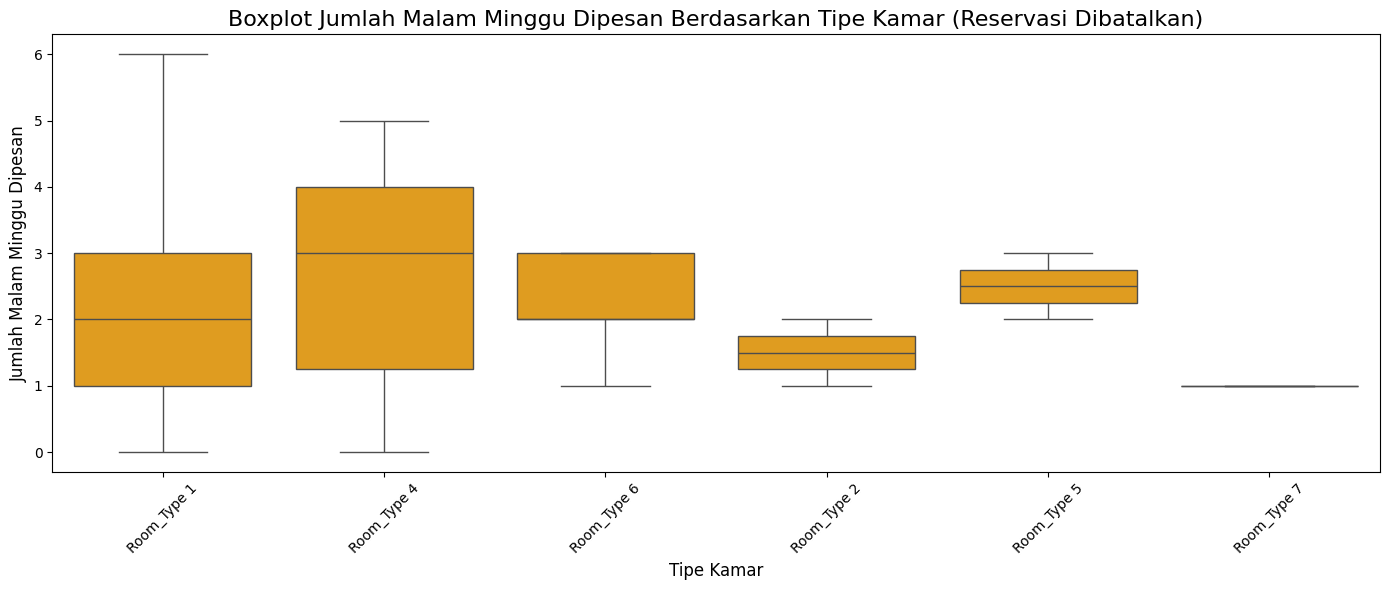

In [ ]:
#BLOXPLOT 

plt.figure(figsize=(14, 6))

# Membuat boxplot untuk jumlah malam minggu dipesan berdasarkan tipe kamar untuk reservasi yang dibatalkan
sns.boxplot(
    x='room_type_reserved', 
    y='no_of_week_nights', 
    data=canceled_reservations, 
    color='orange',  # Warna oranye seperti contoh gambar
    showfliers=False  # Tidak menampilkan outliers
)

# Menambahkan judul dan label
plt.title('Boxplot Jumlah Malam Minggu Dipesan Berdasarkan Tipe Kamar (Reservasi Dibatalkan)', fontsize=16)
plt.xlabel('Tipe Kamar', fontsize=12)
plt.ylabel('Jumlah Malam Minggu Dipesan', fontsize=12)
# Rotasi label pada sumbu X untuk keterbacaan
plt.xticks(rotation=45, fontsize=10)
# Menampilkan plot
plt.tight_layout()
plt.show()

Penjelasan : 

memperlihatkan distribusi jumlah malam minggu yang dipesan berdasarkan tipe kamar untuk reservasi yang dibatalkan. Tipe kamar Room_Type 4 memiliki median jumlah malam yang lebih tinggi dibandingkan tipe lainnya, menunjukkan bahwa reservasi untuk kamar ini sering mencakup durasi inap lebih lama. Tipe kamar Room_Type 1 memiliki penyebaran data terbesar, sedangkan Room_Type 2 menunjukkan distribusi yang paling sempit, mengindikasikan konsistensi dalam jumlah malam minggu yang dipesan. Analisis ini menunjukkan adanya hubungan antara tipe kamar tertentu dan kecenderungan pembatalan.

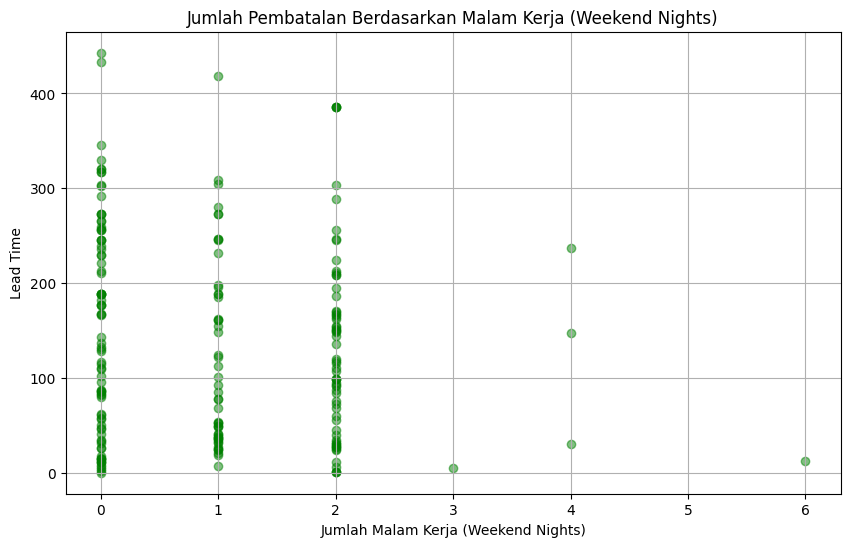

In [19]:
import matplotlib.pyplot as plt

# Filter data untuk pembatalan saja
canceled_data = df[df['booking_status'] == 'Canceled']

# Scatter plot untuk lead time vs no_of_weekend_nights
plt.figure(figsize=(10, 6))
plt.scatter(canceled_data['no_of_weekend_nights'], canceled_data['lead_time'], 
            alpha=0.5, color='green')
plt.title('Jumlah Pembatalan Berdasarkan Malam Kerja (Weekend Nights)')
plt.xlabel('Jumlah Malam Kerja (Weekend Nights)')
plt.ylabel('Lead Time')
plt.grid(True)
plt.show()


Penjelasan : 

Scatter plot menunjukkan hubungan antara jumlah malam kerja (weekend nights) yang dipesan dengan lead time (waktu pemesanan sebelum kedatangan). Sebagian besar pembatalan terjadi pada reservasi dengan lead time pendek (kurang dari 100 hari) dan untuk jumlah malam kerja yang sedikit (0-2 malam). Namun, terdapat beberapa outlier yang menunjukkan pembatalan pada reservasi dengan lead time sangat panjang, hingga lebih dari 400 hari. Grafik ini mengindikasikan bahwa pembatalan lebih sering terjadi pada reservasi dengan durasi pendek dan waktu pemesanan yang relatif dekat dengan tanggal kedatangan.

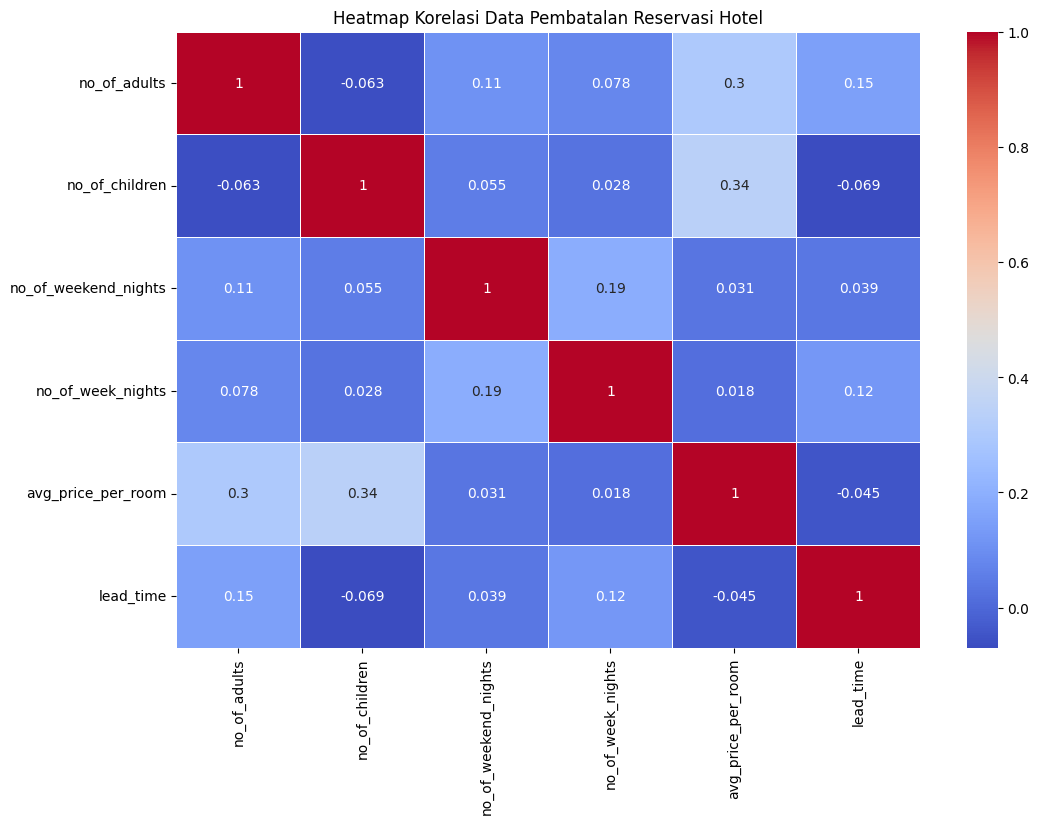

In [20]:
import seaborn as sns

# Pilih kolom numerik untuk analisis korelasi
numerical_columns = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 
                     'no_of_week_nights', 'avg_price_per_room', 'lead_time']

# Hitung matriks korelasi
correlation_matrix = df[numerical_columns].corr()

# Plot heatmap korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap Korelasi Data Pembatalan Reservasi Hotel')
plt.show()


Penjelasan : 

Heatmap ini menunjukkan hubungan antara variabel-variabel seperti jumlah orang dewasa, jumlah anak, harga rata-rata per kamar, dan waktu pemesanan sebelum kedatangan. Korelasi positif moderat terlihat antara avg_price_per_room dengan no_of_adults (0.3) dan no_of_children (0.34), yang menunjukkan bahwa kamar dengan harga lebih tinggi cenderung dipesan oleh pelanggan dengan lebih banyak anggota keluarga. Sementara itu, variabel lainnya memiliki hubungan yang lemah atau tidak signifikan.

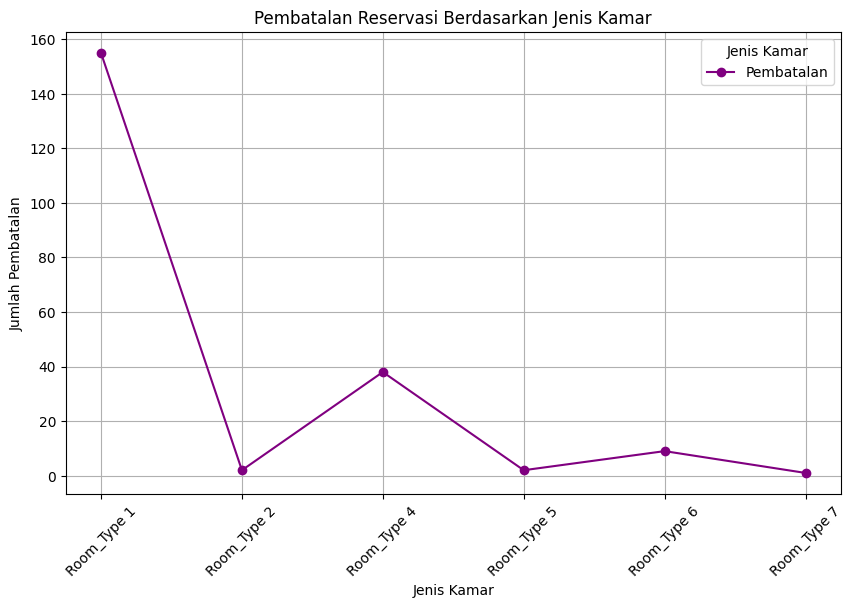

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_excel('Hotel-Reservation-Dataset.xlsx')

# Filter data untuk hanya pembatalan
canceled_reservations = df[df['booking_status'] == 'Canceled']

# Mengelompokkan data berdasarkan jenis kamar
data_grouped = canceled_reservations.groupby('room_type_reserved').size()

# Membuat line plot (meskipun biasanya bar plot lebih tepat)
plt.figure(figsize=(10, 6))
plt.plot(data_grouped.index, data_grouped.values, label='Pembatalan', marker='o', color='purple')

plt.title('Pembatalan Reservasi Berdasarkan Jenis Kamar')
plt.xlabel('Jenis Kamar')
plt.ylabel('Jumlah Pembatalan')
plt.xticks(rotation=45)
plt.legend(title='Jenis Kamar')
plt.grid(True)
plt.show()


penjelasan :

Line plot ini menunjukkan jumlah pembatalan reservasi per tipe kamar. Room_Type_1 memiliki pembatalan tertinggi, sedangkan tipe lain seperti Room_Type_2 dan Room_Type_7 hampir tidak ada pembatalan. Room_Type_1 mungkin lebih populer, tetapi juga berpotensi sering dibatalkan, sehingga perlu analisis lebih lanjut untuk memahami penyebabnya.

Kesimpulan :

- Maret dan Juni mencatat pembatalan tertinggi, kemungkinan karena tingginya reservasi pada periode tersebut.  
- Room_Type 4 sering dipesan untuk durasi lebih lama, sementara Room_Type 1 memiliki pembatalan terbanyak.  
- Pembatalan lebih sering terjadi pada reservasi dengan lead time pendek dan durasi inap singkat.  
- Kamar lebih mahal biasanya dipesan oleh keluarga dengan lebih banyak anggota.  
- Room_Type 1 membutuhkan perhatian khusus untuk mengurangi pembatalan, dan kebijakan pembatalan dapat ditinjau ulang untuk meningkatkan efisiensi.

In [ ]:
pip install pandas scikit-learn

Modeling

Training Random Forest Model...

Evaluasi Model Random Forest:
Akurasi: 0.8357142857142857
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.92      0.89        99
           1       0.76      0.63      0.69        41

    accuracy                           0.84       140
   macro avg       0.81      0.78      0.79       140
weighted avg       0.83      0.84      0.83       140

Confusion Matrix:
 [[91  8]
 [15 26]]


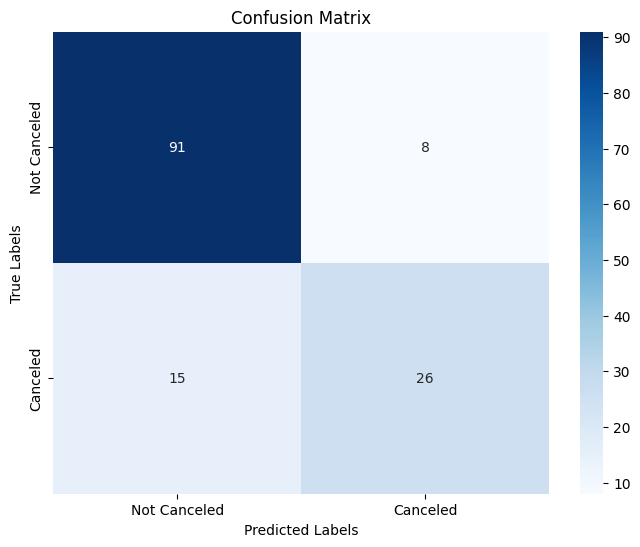

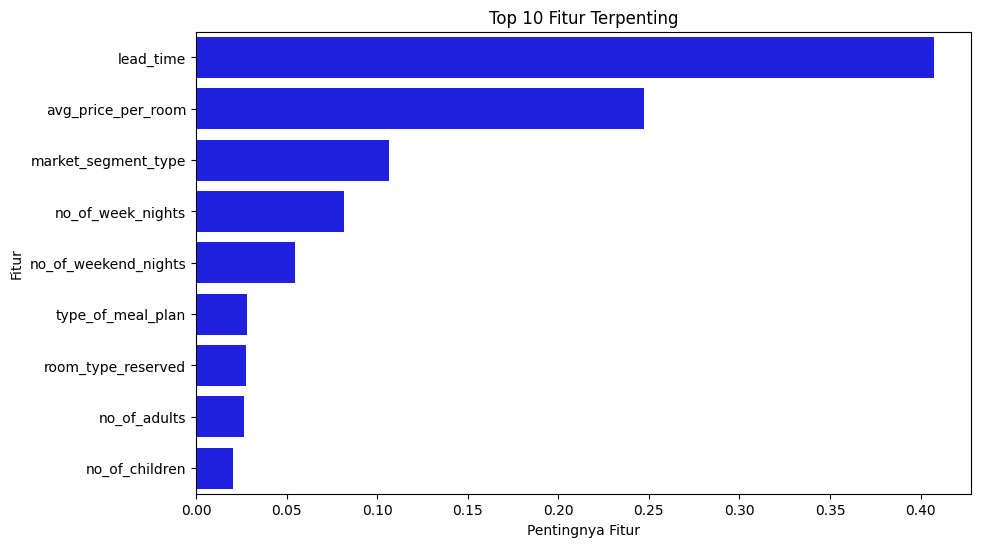

In [6]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load Data
df = pd.read_excel("Hotel-Reservation-Dataset.xlsx")  # Memastikan file path benar

# 2. Preprocessing Data
# Menangani missing values (nilai yang hilang)
df = df.dropna()  # Menghapus baris yang memiliki nilai kosong

# Menghapus kolom non-numerik yang tidak digunakan, seperti 'arrival_date'
if 'arrival_date' in df.columns:
    df = df.drop(columns=['arrival_date'])

# Encoding fitur kategorikal (mengubah data kategori menjadi angka)
label_encoder = LabelEncoder()
categorical_cols = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type']
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])  # Mengubah kolom kategorikal menjadi angka

# Memisahkan fitur (X) dan target (y)
X = df.drop(columns=['Booking_ID', 'booking_status'])  # Fitur input, menghapus kolom yang tidak digunakan
y = df['booking_status'].apply(lambda x: 1 if x == 'Canceled' else 0)  # Target (1: Canceled, 0: Confirmed)

# Memisahkan data menjadi train dan test (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature Scaling (opsional) - hanya untuk fitur numerik
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Melakukan normalisasi pada data latih
X_test = scaler.transform(X_test)  # Melakukan normalisasi pada data uji

# 3. Random Forest Classifier
print("Training Random Forest Model...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # Menggunakan Random Forest dengan 100 pohon
rf_model.fit(X_train, y_train)  # Melatih model dengan data latih
rf_preds = rf_model.predict(X_test)  # Membuat prediksi menggunakan data uji

# 4. Evaluasi Model
# Mengukur akurasi model
print("\nEvaluasi Model Random Forest:")
print("Akurasi:", accuracy_score(y_test, rf_preds))  # Menghitung akurasi prediksi
print("Classification Report:\n", classification_report(y_test, rf_preds))  # Menampilkan laporan klasifikasi
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_preds))  # Menampilkan matriks kebingungannya

# Visualisasi Confusion Matrix (Matriks Kebingungannya)
conf_matrix = confusion_matrix(y_test, rf_preds)  # Menghitung confusion matrix
plt.figure(figsize=(8, 6))  # Mengatur ukuran gambar
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Canceled', 'Canceled'], yticklabels=['Not Canceled', 'Canceled'])  # Membuat heatmap
plt.title('Confusion Matrix')  # Menambahkan judul
plt.xlabel('Predicted Labels')  # Menambahkan label sumbu X
plt.ylabel('True Labels')  # Menambahkan label sumbu Y
plt.show()  # Menampilkan visualisasi

# Visualisasi Feature Importance (Pentingnya Fitur)
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False).head(10)  # Mengambil 10 fitur terpenting

plt.figure(figsize=(10, 6))  # Mengatur ukuran gambar
sns.barplot(x=feature_importances, y=feature_importances.index, color='blue')  # Membuat barplot
plt.title("Top 10 Fitur Terpenting")  # Menambahkan judul
plt.xlabel("Pentingnya Fitur")  # Menambahkan label sumbu X
plt.ylabel("Fitur")  # Menambahkan label sumbu Y
plt.show()  # Menampilkan visualisasi


In [10]:
pip install streamlit



     ---------------------------------------- 9.1/9.1 MB 594.9 kB/s eta 0:00:00
     ------------------------------------ 207.3/207.3 kB 382.7 kB/s eta 0:00:00
     ---------------------------------------- 6.9/6.9 MB 532.6 kB/s eta 0:00:00
     ------------------------------------ 434.5/434.5 kB 936.5 kB/s eta 0:00:00
     -------------------------------------- 25.1/25.1 MB 548.8 kB/s eta 0:00:00
     ------------------------------------ 731.2/731.2 kB 569.9 kB/s eta 0:00:00
     -------------------------------------- 79.1/79.1 kB 732.2 kB/s eta 0:00:00
     ------------------------------------ 242.4/242.4 kB 646.8 kB/s eta 0:00:00
     -------------------------------------- 64.9/64.9 kB 868.1 kB/s eta 0:00:00
     -------------------------------------- 97.9/97.9 kB 266.6 kB/s eta 0:00:00
     -------------------------------------- 88.5/88.5 kB 295.2 kB/s eta 0:00:00
     ------------------------------------ 133.3/133.3 kB 238.4 kB/s eta 0:00:00
     ----------------------------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip available: 22.2.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
pip install --upgrade streamlit

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
